# Question 1:
Yes, the RA-Dec system would change today due to the Earth's precession about its axis. As an example, we would like to find the actual RA and Dec of Cygnus A whose J2000 corrdinates are given. First we import the necessary libraries and modules.

In [1]:
from astropy.coordinates import SkyCoord, FK5, EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

Now assigning the J2000 coordinates to variables "ra_j2k" and "dec_j2k":

In [2]:
ra_j2k = '19h59m28.3566s'
dec_j2k = '+40d44m02.096s'

Defining and converting the above coordinates in J2000 epoch Sky Coordinates:

In [3]:
t_j2k = Time('J2000')
coord_j2k = SkyCoord(ra=ra_j2k, dec=dec_j2k, frame=FK5(equinox=t_j2k), unit=(u.hourangle, u.deg))

Now converting the old coordinates into new ones (FK5) with equinox set today's date:

In [4]:
t_now = Time.now()
coord_now = coord_j2k.transform_to(FK5(equinox=t_now))

Thus, the final result:

In [5]:
print('Old coordinates:')
print('RA  =', coord_j2k.ra.to_string(unit=u.hour, sep=':', precision=6))
print('Dec =', coord_j2k.dec.to_string(sep=':', precision=3))
print('Transformed to new coordinates defined at:', t_now.iso)
print('RA  =', coord_now.ra.to_string(unit=u.hour, sep=':', precision=6))
print('Dec =', coord_now.dec.to_string(sep=':', precision=3))

Old coordinates:
RA  = 19:59:28.356600
Dec = 40:44:02.096
Transformed to new coordinates defined at: 2026-01-19 10:53:06.461
RA  = 20:00:22.467194
Dec = 40:48:22.987


# Question 2:
The coordinates of IIT Kanpur according to internet is Latitude: 26.52°N and Longitude: 80.23° E

In [6]:
IITK_loc = EarthLocation(lat=26.52*u.deg, lon=80.23*u.deg, height=72*u.m)

Now using the spherical coordinate formulas taught in class:
1) Hour Angle = Local Sidereal Time - RA
2) sin(Elevation) = sin(ϕ)sin(δ)+cos(ϕ)cos(δ)cos(H) 
alongwith importing the coordinates of Cygnus A in the ICRS frame in J2000 epoch.

In [7]:
cyg_a = SkyCoord("19h59m28.3566s", "+40d44m02.096s", frame="icrs")
#Choosing a specific time
obs_time = Time("2026-01-18 20:00:00")
#Finding the Alt-Az frame at that time and location
altaz_frame = AltAz(obstime=obs_time, location=IITK_loc)
#Transforming to AltAz final coordinates
cyg_a_altaz = cyg_a.transform_to(altaz_frame)

Now finally printing the output gives us:

In [8]:
print("Azimuth :", cyg_a_altaz.az.deg, "deg")
print("Elevation:", cyg_a_altaz.alt.deg, "deg")

Azimuth : 14.770371267482604 deg
Elevation: -20.545531953751247 deg


# Question 3:
We extract the azimuth and altitude of Cygnus A from the previously solved question. For polar plot of Cygnus A, the track will be a smooth arc over the northern part of the sky starting from North East and setting in North West, due to its position from IITK. Matplotlib will be used to plot the graph.

C:\Users\DELL\AppData\Local\Temp\ipykernel_34012\3419741557.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0.1))


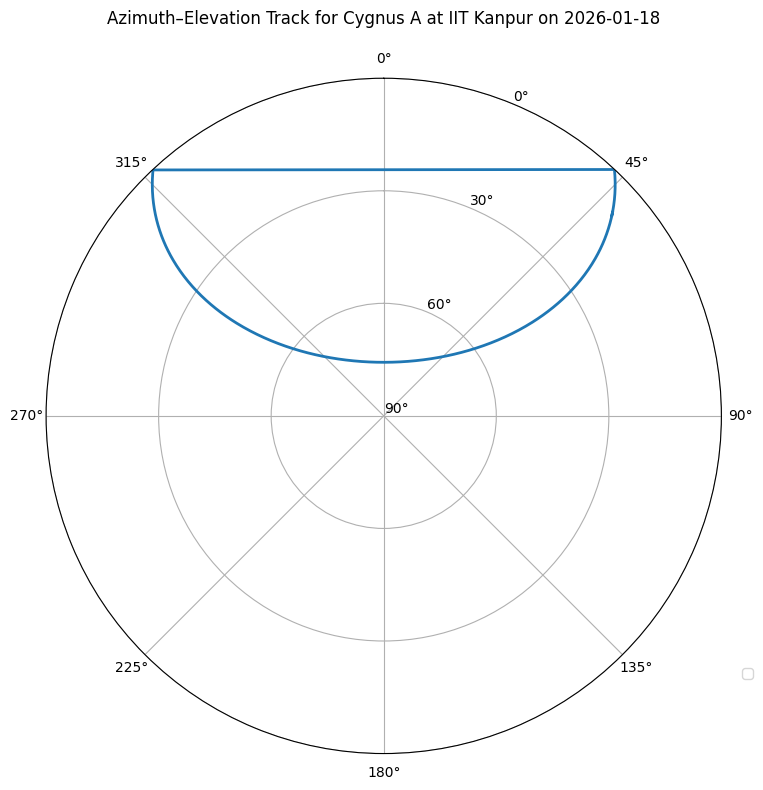

In [9]:
location = EarthLocation(lat=26.5214*u.deg, lon=80.2321*u.deg, height=72*u.m)  #Location of IIT Kanpur
cyga = SkyCoord("19h59m28.3566s", "+40d44m02.096s", frame="icrs")  #Coordinates of Cygnus A
date = "2026-01-18"
n_points = 800 #no of points over 24 hours

#Compute alt/az over the day
start_time = Time(f"{date} 00:00:00", scale="utc")
times = start_time + np.linspace(0, 24, n_points) * u.hour # Sampling one full day
altaz_frame = AltAz(obstime=times, location=location)
cyga_altaz = cyga.transform_to(altaz_frame)

#Converting azimuth and altitude in degrees
az = cyga_altaz.az.deg    
alt = cyga_altaz.alt.deg  

#Masking only points below horizon
mask = alt >= 0.0
if not np.any(mask):
    raise SystemExit("Cygnus A is below the horizon for the entire day at this location/date.")
az_visible = az[mask]
alt_visible = alt[mask]
t_visible = times[mask]
az_rad = np.deg2rad(az_visible)  # Convert azimuth to radians for plotting
r = 90.0 - alt_visible
dtheta = np.abs(np.diff(np.unwrap(az_rad)))
breaks = np.where(dtheta > np.deg2rad(150))[0]  #taking a threshold of 150deg
segments = []
start = 0
for b in breaks:
    segments.append((az_rad[start:b+1], r[start:b+1], t_visible[start:b+1]))
    start = b+1
segments.append((az_rad[start:], r[start:], t_visible[start:]))

# Plotting the polar graph
plt.style.use('default')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')
for seg_az, seg_r, seg_t in segments:
    ax.plot(seg_az, seg_r, linewidth=2)
ax.set_theta_zero_location("N")   # 0° at North
ax.set_theta_direction(-1)        # clockwise azimuth
ax.set_rlim(0, 90)
rticks = [0, 30, 60, 90]   # r values
rlabels = [f"{int(90 - rtick)}°" for rtick in rticks]
ax.set_rticks(rticks)
ax.set_yticklabels(rlabels)

ax.set_title(f"Azimuth–Elevation Track for Cygnus A at IIT Kanpur on {date}", pad=20)
ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0.1))

plt.tight_layout()
plt.show()

# Question 4:
We know that the Sun covers a full cycle over a year due to the revolution of Earth but Cygnus A has constant coordinates due to (almost) no proper motion. A proper track for Cygnus A can be observed over a longer period of time such as a decade or a century.


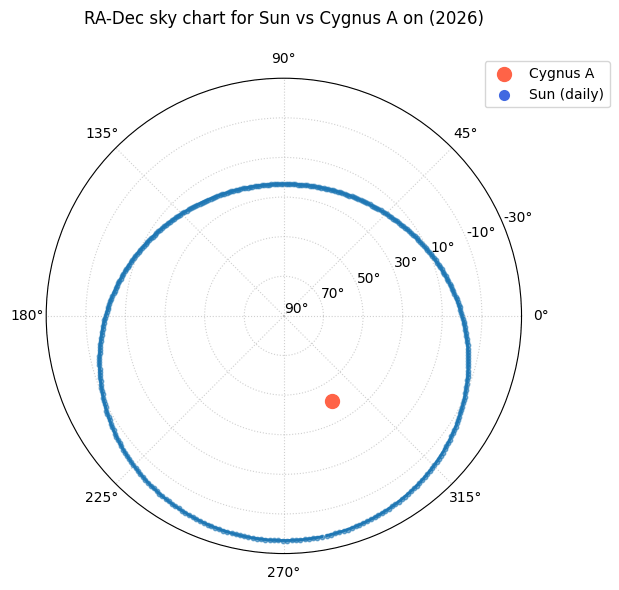

In [13]:
year = 2026
times = Time(f"{year}-01-01 00:00:00") + np.linspace(0, 364, 365) * u.day  # daily samples for the year
sun = get_sun(times)                 # returns a SkyCoord
ra_sun_deg  = sun.ra.deg             # 0..360 degrees
dec_sun_deg = sun.dec.deg

theta = np.deg2rad(ra_sun_deg)
r_sun  = 90.0 - dec_sun_deg

theta_unwrapped = np.unwrap(theta)
dtheta = np.abs(np.diff(theta_unwrapped))
jump_indices = np.where(dtheta > np.deg2rad(150))[0]   # threshold (150°) to detect wrap-around

segments = []
start = 0
for ji in jump_indices:
    segments.append((theta[start:ji+1], r_sun[start:ji+1]))
    start = ji+1
segments.append((theta[start:], r_sun[start:]))

#For Cygnus A
ra_cyga_deg = cyga.ra.deg
dec_cyga_deg = cyga.dec.deg
theta_cyga = np.deg2rad(ra_cyga_deg)
r_cyga = 90.0 - dec_cyga_deg

#For Sun
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='polar')
for seg_theta, seg_r in segments:
    ax.plot(seg_theta, seg_r, lw=2, label='_nolegend_')  # label suppressed, we'll add single legend entry later
ax.scatter(theta, r_sun, s=10, alpha=0.6)

# plot Cygnus A
ax.scatter([theta_cyga], [r_cyga], color='tomato', s=100, zorder=10, label='Cygnus A')
ax.scatter([], [], color='royalblue', lw=2, label='Sun (daily)')  # fake handle for legend
ax.set_theta_zero_location("E")   # 0° at right (East) like your example
ax.set_theta_direction(1)         # counter-clockwise angular increase (so 90° is top)

#Graph limits
rmax = 120
ax.set_rlim(0, rmax)
rticks = np.arange(0, rmax+1, 20)  # e.g., 0,20,40,...,120
ax.set_rticks(rticks)
rlabels = [f"{(90 - r):.0f}°" for r in rticks]   # e.g. 90->0°, 70->20°, ...
ax.set_yticklabels(rlabels)
ax.set_title(f"RA-Dec sky chart for Sun vs Cygnus A on ({year})", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.20, 1.05))
ax.grid(ls=':', alpha=0.6)

plt.tight_layout()
plt.show()
